In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3


In [ ]:
path = 'drive/My Drive/股票'

In [ ]:
dbName = path + '/twstock_indie.db'
db = sqlite3.connect(dbName)

stocks = {}
stocks.update({'1210': pd.read_sql(con=db, sql='select * from "1210"')})
stocks.update({'1515': pd.read_sql(con=db, sql='select * from "1515"')})
# stocks.update({'6150': pd.read_sql(con=db, sql='select * from "6150"')})
stocks.update({'8163': pd.read_sql(con=db, sql='select * from "8163"')})

In [ ]:
# pd.read_sql(con=db, sql="SELECT count(*) FROM sqlite_master WHERE type = 'table'")

In [ ]:
dfTest = stocks['8163'].copy()

In [ ]:
dfTest.index = pd.to_datetime(dfTest['Date'])
dfTest = dfTest[['證券名稱','收盤價']]

In [ ]:
dfTest['收盤價'] = dfTest['收盤價'].apply(lambda x:x.replace(',',''))

In [ ]:
dfTest['收盤價'] = pd.to_numeric(dfTest['收盤價'])

In [ ]:
dfTest.columns = ['name', 'close']

In [ ]:
dfTest.head()

,name,close
Date,,
2019-06-03,達方,42.80
2019-06-04,達方,42.75
2019-06-05,達方,42.20
2019-06-06,達方,41.75
2019-06-10,達方,42.60


In [ ]:
for key in stocks.keys():
  df = stocks[key]
  df.index = pd.to_datetime(df['Date'])
  df = df[['證券名稱','收盤價']]
  df['收盤價'] = df['收盤價'].apply(lambda x:x.replace(',',''))
  df['收盤價'] = pd.to_numeric(df['收盤價'])
  df.columns = ['name', 'close']
  stocks[key] = df


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


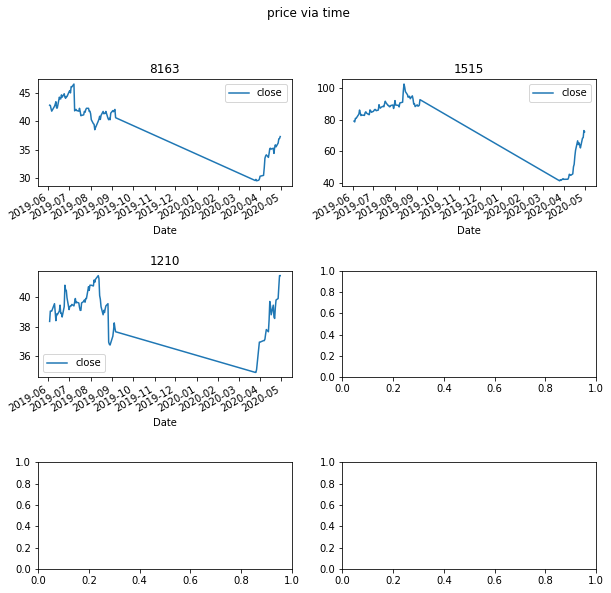

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(10,10))
plt.subplots_adjust(hspace=0.8)

stocks['8163']['2019-06-03':].plot(ax=ax[0,0])
ax[0,0].set_title('8163')

stocks['1515']['2019-06-03':].plot(ax=ax[0,1])
ax[0,1].set_title('1515')

stocks['1210']['2019-06-03':].plot(ax=ax[1,0])
ax[1,0].set_title('1210')

fig.suptitle('price via time')
plt.show()

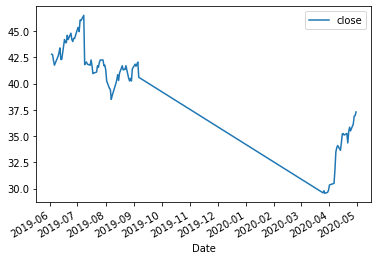

In [ ]:
stocks['8163']['2019-06-03':].plot()